In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from adjdatatools.preprocessing import AdjustedScaler


In [2]:
df = pd.read_excel('Kvart_Sovet.xlsx')

In [ ]:
for i in range(len(df['street'])):
    if df['street'][i] == 'Академика Коптюга пр-кт' or df['street'][i] == 'Академика_Коптюга':
        df['street'][i] = 'Академика_Коптюга_проспект'
    elif df['street'][i] == 'Морской пр-кт':
        df['street'][i] = 'Морской_проспект'
    elif df['street'][i] == 'Молодeжи б-р' or df['street'][i] == 'Молодёжи б-р' or df['street'][i] == 'Молодёжи бульвар' or df['street'][i] == 'Молодежи_б-р':
        df['street'][i] = 'Молодежи_бульвар'
    elif df['street'][i] == 'Ученых':
        df['street'][i] = 'Учёных'
    elif df['street'][i] == 'Академика_Иванова':
        df['street'][i] = 'Иванова'
for i in range(len(df['street'])):
    s = ''
    a = df['street'][i].split(' ')
    if len(a) != 1:
        for j in range(2):
            if j == 0:
                s += a[j] + '_'
            else:
                s += a[j]
        df['street'][i] = s

In [5]:
set(df['street'].to_list())

{'40_лет',
 'Академика_Коптюга_проспект',
 'Академическая',
 'Арбузова',
 'Балтийская',
 'Барьерная',
 'Благовещенская',
 'Боровая_Партия',
 'Варшавская',
 'Вахтангова',
 'Весенний_проезд',
 'Ветлужская',
 'Вяземская',
 'Героев_Труда',
 'Гидромонтажная',
 'Демакова',
 'Детский_проезд',
 'Динамовцев',
 'Добровольческая',
 'Жемчужная',
 'Зеленая_Горка',
 'Золотодолинская',
 'Иванова',
 'Ивлева',
 'Ильича',
 'Лесосечная',
 'Миргородская_2-я',
 'Молодежи_бульвар',
 'Молодости',
 'Морской_проспект',
 'Мусы_Джалиля',
 'Николаева',
 'Новоморская',
 'Одоевского',
 'Печатников',
 'Пирогова',
 'Полевая',
 'Правды',
 'Приморская',
 'Разъездная',
 'Российская',
 'Рубиновая',
 'Русская',
 'Рыбацкая',
 'Садовый',
 'Садовый_проезд',
 'Сердюкова',
 'Сиреневая',
 'Смоленская',
 'Солнечногорская',
 'Софийская',
 'Терешковой',
 'Тружеников',
 'Учёных',
 'Цветной_проезд',
 'Часовая',
 'Шатурская',
 'Шлюзовая',
 'Экваторная',
 'Энгельса'}

In [6]:
df.loc[df.sp_kitchen == '-', 'sp_kitchen'] = np.nan
kvart_new = df[df.sp_kitchen.notna()]

In [7]:
kvart_new = kvart_new[(kvart_new.sp_total < 120) & (kvart_new.price <= 15000)]

In [8]:
fig = px.box(kvart_new, y='sp_total')
fig.update_layout(title='Total square of the flat in square meters',
                  legend_orientation='h')
fig.show()

Text(0, 0.5, 'Quantity')

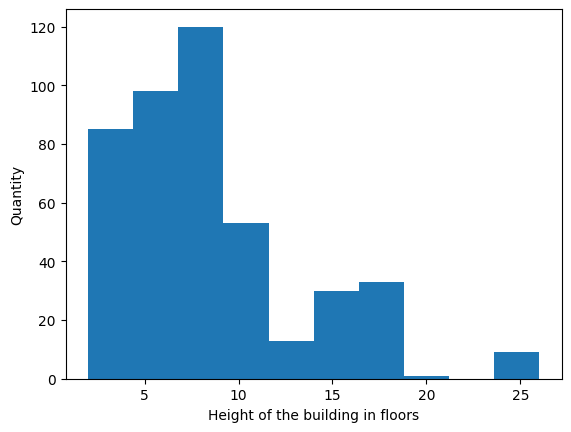

In [219]:
plt.hist(kvart_new['height'])
plt.xlabel('Height of the building in floors')
plt.ylabel('Quantity')

Text(0.5, 0, 'Floor of the flat')

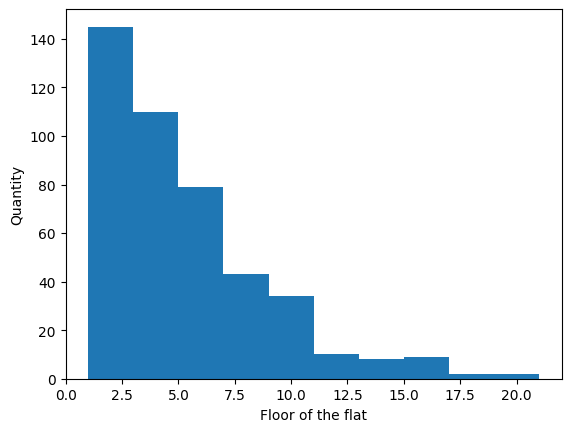

In [220]:
plt.hist(kvart_new['floor'])
plt.ylabel('Quantity')
plt.xlabel('Floor of the flat')

Text(0.5, 0, 'Price of the flat')

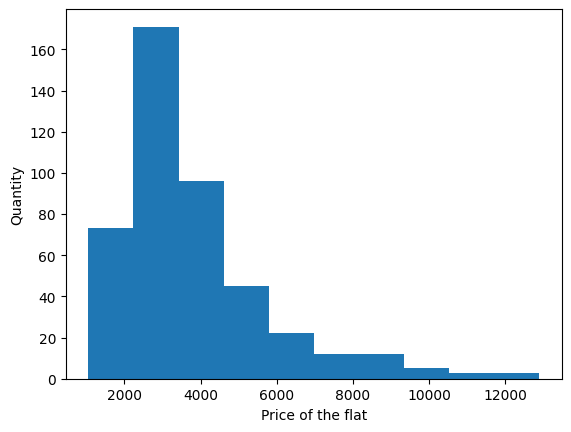

In [222]:
plt.hist(kvart_new['price'])
plt.ylabel('Quantity')
plt.xlabel('Price of the flat')

Text(0.5, 0, 'Total square of the flat in square meters')

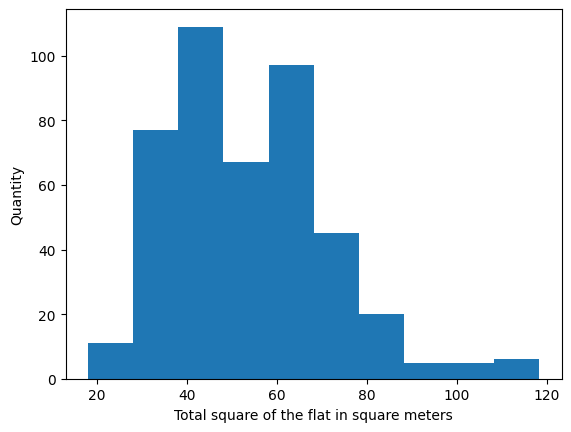

In [223]:
plt.hist(kvart_new['sp_total'])
plt.ylabel('Quantity')
plt.xlabel('Total square of the flat in square meters')

In [9]:
kvart_new = kvart_new.dropna(how='all')


In [10]:
new_scaler = AdjustedScaler(columns=['sp_total', 'sp_living', 'sp_kitchen', 'floor', 'height'])
new_scaler.fit(kvart_new)
kvart_new2 = new_scaler.transform(kvart_new)


In [11]:
for i in set(kvart_new.columns.to_list()) - set(kvart_new2.columns.to_list()):
    kvart_new2[i] = kvart_new[i]

In [12]:
kvart_new2 = kvart_new2.drop(columns=['ID', 'city', 'district'])

In [ ]:
def find_number(series):
    c = 0
    for i in series:
        number = ''
        for k in str(i):
            if k.isdigit() and k != '/':
                number += k
            else:
                break
        series[c] = int(number)
        c += 1
    return series


kvart_new2['h_number'] = find_number(kvart_new2['h_number'])

In [14]:
side_list = []
for i in kvart_new2['h_number']:
    try:
        if int(i) % 2 == 0:
            side_list.append(1)
        else:
            side_list.append(0)
    except ValueError:
        number = ''
        for k in str(i):
            if k.isdigit() and k != '/':
                number += k
            else:
                break
        if int(number) % 2 == 0:
            side_list.append(1)
        else:
            side_list.append(0)
kvart_new2['side'] = side_list
kvart_new2 = kvart_new2.drop(['h_number'], axis=1)

In [15]:
df_dummy_wd = pd.get_dummies(kvart_new2, columns=['street', 'rooms'], dtype = 'float64', drop_first = True)

In [31]:
train, test = train_test_split(df_dummy_wd, test_size=0.27)
test_regressors = test.drop(columns=['price'])
test_price = test.price
train_regressors = train.drop(columns=['price'])
regressors = train_regressors.columns.to_list()

In [32]:
test.shape, train.shape

((120, 68), (322, 68))

In [33]:
maxpvalue = 1
n = 1

while maxpvalue > 0.05:
    x = train[regressors]
    y = train['price']
    x1 = sm.add_constant(x)
    model = sm.OLS(y, x1.astype(float)).fit()
    pv = model.pvalues.to_list()
    maxpv = max(pv[1:])
    max_index = pv.index(maxpv)
    print('Номер интерации: '+ str(n))
    print('Регрессор с максимальным p-value: '+ str(regressors[max_index-1]) + ' P-value: '+ str(maxpv))
    print('-------------------------------------------------------------')

    if maxpv > 0.05:
        regressors.pop(max_index - 1)
        maxpvalue = maxpv
        n += 1
    else:
        maxpvalue = 0

print('Итоговая модель: ')
y = train['price']
x = train[regressors]
x1 = sm.add_constant(x)
model = sm.OLS(y, x1.astype(float)).fit()
print(model.summary2())

Номер интерации: 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     24.14
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           2.68e-77
Time:                        23:27:05   Log-Likelihood:                -2620.1
No. Observations:                 322   AIC:                             5360.
Df Residuals:                     262   BIC:                             5587.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const  

In [35]:
test_1 = test_regressors[model.params.index.to_list()[1:]]
test_1 = sm.add_constant(test_1)
pred = model.predict(test_1)
print(pred)

45     3232.370691
417    2173.888475
405    3220.117097
163    2083.525737
29     3570.505118
          ...     
0      1528.670337
426    3619.577064
437    3350.309949
413    3701.125822
198    2085.348816
Length: 120, dtype: float64


In [34]:
model.params

const                      3951.485530
sp_total                   7347.086724
height                      732.154184
street_Академическая       2174.145455
street_Балтийская          -540.713055
street_Героев_Труда        1086.211678
street_Демакова             861.560980
street_Жемчужная           1992.686775
street_Золотодолинская     3707.143655
street_Иванова              755.321613
street_Ильича              3794.463212
street_Лесосечная          -511.030361
street_Молодежи_бульвар     827.753240
street_Молодости           -884.273235
street_Морской_проспект    3960.782442
street_Пирогова            2837.849934
street_Полевая              743.595945
street_Правды              3534.831959
street_Приморская          -951.610095
street_Разъездная          1519.377690
street_Российская          1849.050175
street_Сиреневая           1012.545519
street_Терешковой          3427.727903
street_Учёных              2416.090041
street_Цветной_проезд      2107.777570
street_Шатурская         

In [36]:
predictions_compare = pd.DataFrame({'real': test_price.to_list(),
                                    'predicted': pred})
print(predictions_compare)

     real    predicted
45   2890  3232.370691
417  2600  2173.888475
405  2850  3220.117097
163  2300  2083.525737
29   3490  3570.505118
..    ...          ...
0    1790  1528.670337
426  2650  3619.577064
437  2790  3350.309949
413  2850  3701.125822
198  2345  2085.348816

[120 rows x 2 columns]


In [37]:
print('MAE:', mean_absolute_error(test_price, pred))
print('MAPE:', mean_absolute_percentage_error(test_price, pred))

MAE: 602.3931200666542
MAPE: 0.1848319011832265


In [38]:
#Chow

df_dummy_wd = sm.add_constant(df_dummy_wd)

y = df_dummy_wd.price
X = df_dummy_wd.drop('price', axis=1)

X_one = X[(X.rooms_2 == 0) & (X.rooms_3 == 0) & (X.rooms_4 == 0)].drop(['rooms_2', 'rooms_3', 'rooms_4'], axis=1)
y_one = df_dummy_wd.price[(X.rooms_2 == 0) & (X.rooms_3 == 0) & (X.rooms_4 == 0)]

X_many = X[(X.rooms_2 != 0) | (X.rooms_3 != 0) | (X.rooms_4 != 0)].drop(['rooms_2', 'rooms_3', 'rooms_4'], axis=1)
y_many = df_dummy_wd.price[(X.rooms_2 != 0) | (X.rooms_3 != 0) | (X.rooms_4 != 0)]

J = X.shape[1]
k = X_one.shape[1]
N1 = X_one.shape[0]
N2 = X_many.shape[0]

model_dummy = sm.OLS(y,X.astype(float)).fit()
RSSd = model_dummy.ssr

model_many = sm.OLS(y_many,X_many.astype(float)).fit()
RSS_many = model_many.ssr

model_one = sm.OLS(y_one,X_one.astype(float)).fit()
RSS_one = model_one.ssr

chow = ((RSSd - (RSS_many+RSS_one))/J)/((RSS_one+RSS_many)/(N1+N2 -2*k))
import scipy
pvalue = (1 - scipy.stats.f.cdf(chow,J, N1+N2 - 2*k))
print(pvalue)
print(chow)
if pvalue < 0.05:
    print('We reject the first hypothesis, coefficients are not the same.')
else:
    print('We accept the first hypothesis.')

0.9999999997059613
0.25269314709464724
We accept the first hypothesis.


In [41]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
scaler = StandardScaler()
cluster_df = df_dummy_wd[['price', 'sp_total', 'height']]
cluster_df_scaled = scaler.fit_transform(cluster_df)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(cluster_df_scaled)
    wcss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(x for x in range(1, 11)), y=wcss, name='WCSS'))
fig.show()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
predicted = kmeans.fit_predict(cluster_df_scaled)


Text(0.5, 0.5, 'Цена квартиры')

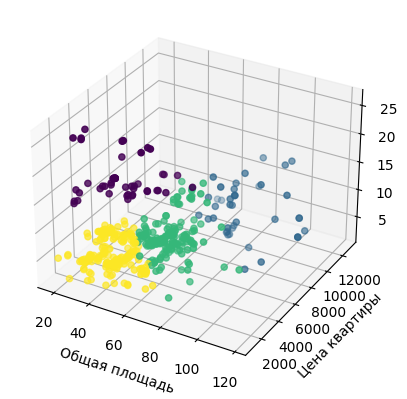

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
predicted = kmeans.fit_predict(cluster_df_scaled)
yaxis = kvart_new2.price.to_list()
xaxis = kvart_new.sp_total.to_list()
zaxis = kvart_new.height.to_list()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xaxis, yaxis, zaxis, c=predicted)

plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')


In [44]:
df_dummy_wd['class'] = predicted

In [45]:
df_dummy_wd.groupby('class').describe()[['price', 'sp_total']]

price                                                             \
       count         mean          std     min      25%     50%     75%   
class                                                                     
0       50.0  3270.720000  1032.265174  1480.0  2812.50  3353.0  3572.5   
1       40.0  8588.700000  1732.342377  5900.0  7396.75  8550.0  9550.0   
2      156.0  4289.185897  1065.290642  1600.0  3400.00  4199.5  5000.0   
3      196.0  2629.137755   745.402405  1050.0  2150.00  2525.0  3000.0   

               sp_total                                                    \
           max    count      mean       std       min       25%       50%   
class                                                                       
0       6250.0     50.0 -0.137119  0.159646 -0.384038 -0.228854 -0.181446   
1      12900.0     40.0  0.444679  0.218498  0.010232  0.289222  0.385402   
2       7190.0    156.0  0.155161  0.118192 -0.052524  0.074011  0.133015   
3       5000.0    196.0 -0.165326  0.120710 -0.480900 -0.268076 -0.154843   

                           
            75%       max  
class                      
0     -0.056958  0.300819  
1      0.611869  0.887449  
2      0.233799  0.652797  
3     -0.112551  0.160300

In [46]:
# Random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:

train, test = train_test_split(df_dummy_wd, test_size=0.2)
df_train, price_train = train.drop('price', axis=1), train['price']
df_test, price_test = test.drop('price', axis=1), test['price']

param_grid = {
    'n_estimators': np.linspace(100, 1200, num=12).astype(int),
    'max_depth': [None] + list(np.linspace(5, 50).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}
estimator = RandomForestRegressor(random_state=50, oob_score=True)
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, scoring='neg_mean_squared_error', n_iter=200,
                        cv = 4,
                        verbose = 2)
rs.fit(df_train, price_train)

In [58]:
rs.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 47,
 'max_features': None,
 'max_depth': 44,
 'bootstrap': True}

In [59]:
best_model = rs.best_estimator_
train_predict = best_model.predict(df_train)

test_predictions = best_model.predict(df_test)

In [64]:
print('train MAPE:', mean_absolute_percentage_error(train_predict, price_train))
print('test MAPE:', mean_absolute_percentage_error(price_test, test_predictions))
print('test MAE:', mean_absolute_error(price_test, test_predictions))
compare = pd.DataFrame({'real price': price_test, 'predicted price': test_predictions})


train MAPE: 0.09716758913346059
test MAPE: 0.11749502550125421
test MAE: 452.21368712431104
